In [1]:
import pandas as pd
import jellyfish
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv('E_C_NoisySet')
df=df.drop(df.columns[[0]] , 1)

In [5]:
months = ["January", "April", "June", "August", "September", "November"] 
colnames=list(df.columns.values)
for x in colnames:
    if x!='STD_Months':
        col=x
        print(col)
        df[col+'_LD'] = ''
        ix = [(row) for row in range(df[col].shape[0])]
        for row in ix:
            print("row: " , row)
            ld_best = 20
            best_match = ''
            for month in months:
                s1 = df[col].iat[row]
                print("s1: " , s1 )
                s2 = month        
                print("s2: " , s2)
                ld = jellyfish.levenshtein_distance(s1 , s2)
                print("LD :" , ld)
                if ld < ld_best:
                    ld_best = ld
                    best_match = s2
                df[col+'_LD'].iat[row] = best_match
                print('\n')
            print("Best Match: " , best_match)
            print("ld_best: " , ld_best)        
            print("*******")

0.1_TypoC
row:  0
s1:  Janruary
s2:  January
LD : 1


s1:  Janruary
s2:  April
LD : 7


s1:  Janruary
s2:  June
LD : 6


s1:  Janruary
s2:  August
LD : 7


s1:  Janruary
s2:  September
LD : 9


s1:  Janruary
s2:  November
LD : 8


Best Match:  January
ld_best:  1
*******
row:  1
s1:  tAugust
s2:  January
LD : 7


s1:  tAugust
s2:  April
LD : 6


s1:  tAugust
s2:  June
LD : 6


s1:  tAugust
s2:  August
LD : 1


s1:  tAugust
s2:  September
LD : 9


s1:  tAugust
s2:  November
LD : 8


Best Match:  August
ld_best:  1
*******
row:  2
s1:  JanJuary
s2:  January
LD : 1


s1:  JanJuary
s2:  April
LD : 8


s1:  JanJuary
s2:  June
LD : 6


s1:  JanJuary
s2:  August
LD : 7


s1:  JanJuary
s2:  September
LD : 9


s1:  JanJuary
s2:  November
LD : 8


Best Match:  January
ld_best:  1
*******
row:  3
s1:  Nlovember
s2:  January
LD : 9


s1:  Nlovember
s2:  April
LD : 9


s1:  Nlovember
s2:  June
LD : 8


s1:  Nlovember
s2:  August
LD : 9


s1:  Nlovember
s2:  September
LD : 4


s1:  Nlovember
s2:  No

In [6]:
#Levenshtein Accuracy
from sklearn.metrics import accuracy_score

NameOfColumns = list(df)
LdAccuracy = []
for x in NameOfColumns:
    if "LD" in x:
        print("LD Accuracy : " , accuracy_score(df["STD_Months"] , df[x])) 
        LdAccuracy.append(accuracy_score(df["STD_Months"] , df[x]))
print(LdAccuracy)

LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  1.0
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


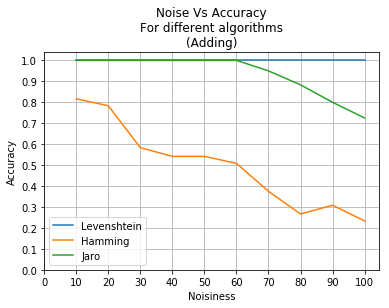

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
x = [10,20,30,40,50,60,70,80,90,100]
yLD=LdAccuracy
yHamming=[0.81666666666666665, 0.78333333333333333, 0.58333333333333337, 0.54166666666666663, 0.54166666666666663, 0.5083333333333333, 0.375, 0.26666666666666666, 0.30833333333333335, 0.23333333333333334]
yJaro=[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.94999999999999996, 0.8833333333333333, 0.80000000000000004, 0.72499999999999998]
plt.plot(x,yLD , label = 'Levenshtein')
plt.plot(x,yHamming , label = 'Hamming')
plt.plot(x,yJaro , label = 'Jaro')
#Add title and label
plt.xlabel('Noisiness')
plt.ylabel('Accuracy')
plt.title('Noise Vs Accuracy\nFor different algorithms\n(Adding)')
plt.xticks(np.arange(0 , 110 , 10))
plt.yticks(np.arange(0 , 1.1 , 0.1))
plt.legend()
plt.grid()
plt.show()